## EDA for IRIS Dataset

### Please Upvote if you like my work 


### In this Notebook we will sovle classification problem of IRIS dataset
#### Dataset has 5 Columns
* Sepal length 
* Sepal Width
* Petal length
* Petal Width
* Species has 3 categories(setosa,virginica,versicolor)

## EDA 

### Import Libraray

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Load Dataset

In [2]:
df = pd.read_csv("../input/iris/Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


### Shape of DataFrame

In [3]:
df.shape

(150, 6)

### Drop Unnecessray feature

In [4]:
df.drop("Id",axis=1,inplace=True)

### Get Statistical Info of all features 

In [5]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### See Total No of Count of each class of Species

In [6]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

### Count Plot : To check data is balance or not?

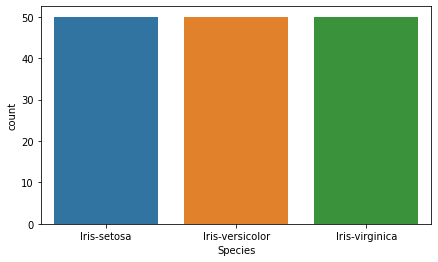

In [7]:
#count plot 
plt.figure(figsize=(7,4))
sns.countplot("Species",data=df)
plt.show()

#### Observation
* As seen dataset is completely balance means equal no all category of Iris-setosa,Iris-versicolor and Iris-virginica

### Pair Plot

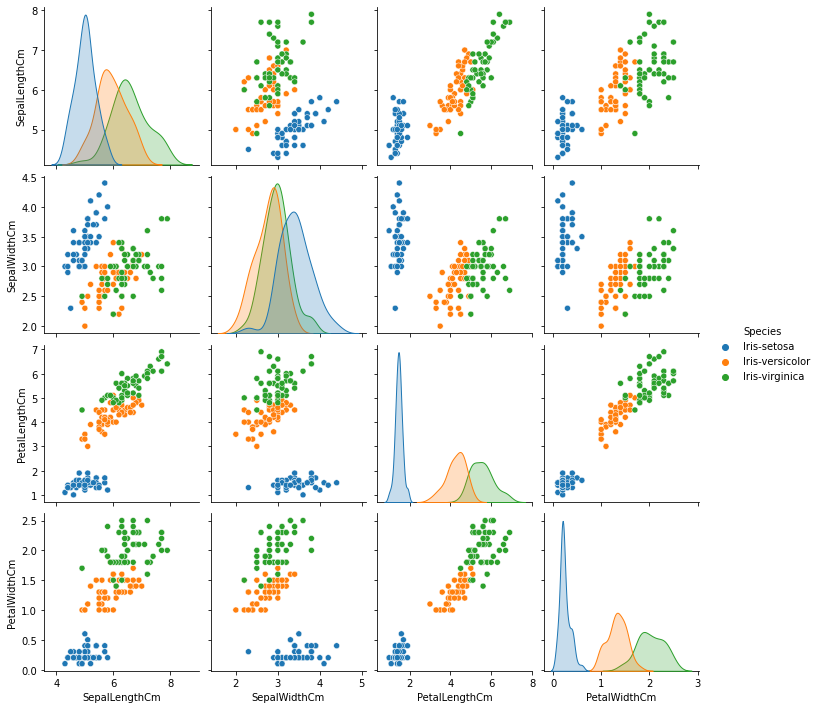

In [8]:
sns.pairplot(df,hue="Species",data=df)

### Scatter Plot :  Sepal Length vs Sepal Width

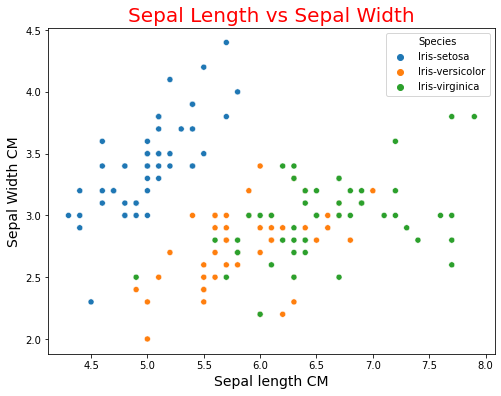

In [9]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="SepalLengthCm",y="SepalWidthCm",hue="Species",data=df)
plt.title("Sepal Length vs Sepal Width",color="red",size=20)
plt.xlabel("Sepal length CM",size=14)
plt.ylabel("Sepal Width CM",size=14)
plt.show()

#### Observation
As seen here correlation between sepal length and sepal width not so good

### Scatter Plot :  Sepal Length vs Sepal Width

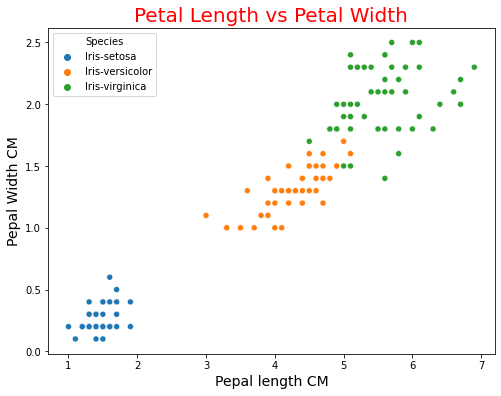

In [10]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="PetalLengthCm",y="PetalWidthCm",hue="Species",data=df)
plt.title("Petal Length vs Petal Width",color="red",size=20)
plt.xlabel("Pepal length CM",size=14)
plt.ylabel("Pepal Width CM",size=14)
plt.show()

#### Observation
As seen here correlation between petal length and petal width is very good
so we can say that petal length and petal width is very imporatant to predict ouput as compared to sepal length and sepal width

### BOX Plot
To know data ditribution of all 3 class of Species for all different features (sepal and petal width and length)

<AxesSubplot:xlabel='Species', ylabel='PetalWidthCm'>

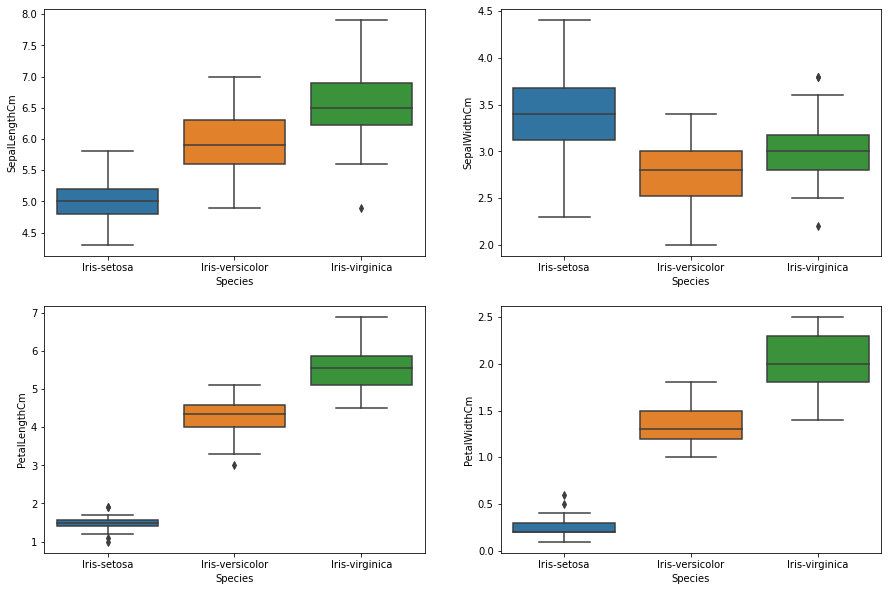

In [11]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.boxplot(x="Species",y="SepalLengthCm",data=df)
plt.subplot(2,2,2)
sns.boxplot(x="Species",y="SepalWidthCm",data=df)
plt.subplot(2,2,3)
sns.boxplot(x="Species",y="PetalLengthCm",data=df)
plt.subplot(2,2,4)
sns.boxplot(x="Species",y="PetalWidthCm",data=df)

#### Observation
* For Iris-versicolor has min petal width is 1.5cm to max 2.5cm and min petal length 4.8cm to max 7cm which is very high compared to other
* Also and for setosa has very small range of petal width and petal length both as compared to other

### Heat Map : To check Correation of all features

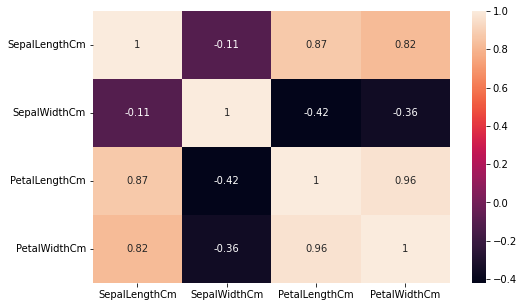

In [12]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(),annot=True)
plt.show()

#### Observation:
* see here as seen above Petal length and Petal width has very strong correlation which is <b>0.96<b> 
* sepal length and sepal width has very poor correlation which is <b>-0.11<b>

### Seperation of Input and Output features (X and Y)

In [13]:
X =df.drop("Species",axis=1)
Y = df['Species']

### Train-Test split with ratio of (70/30)

In [14]:
#Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=1)

## Model Training
* Now we will use differents classification algorithmns to solve classification problem
* logistic regression, 
* support vector Machine 
* Decision Tree, 
* KNN, 
* Naive bayes

#### Import all the required library

In [15]:
#logistic regression
from sklearn.linear_model import LogisticRegression 

#support vector Machine
from sklearn import svm 

#Decision Tree
from sklearn.tree import DecisionTreeClassifier

#KNN
from sklearn.neighbors import KNeighborsClassifier 

#Naive bayes
from sklearn.naive_bayes import GaussianNB 

In [16]:
#accuracy measure
from sklearn import metrics

#for confusion matrix
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report

In [17]:
models = ["Logistic Regression","linear-SVM",'KNN',"Decision Tree","Gaussian Naive Bayes"]
scores = []

### Logistic Regression

In [18]:
model = LogisticRegression()
model.fit(X_train,Y_train)
y_pred_lr = model.predict(X_test)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(Y_test,y_pred_lr))
print(classification_report(Y_test,y_pred_lr))
scores.append(metrics.accuracy_score(Y_test,y_pred_lr))

The accuracy of the Logistic Regression is 0.9777777777777777
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.93      1.00      0.96        13

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



### Linear Support Vector Machine(linear-SVM)

In [19]:
model = svm.SVC(kernel='linear')
model.fit(X_train,Y_train)
y_pred_svm = model.predict(X_test)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(Y_test,y_pred_svm))
scores.append(metrics.accuracy_score(Y_test,y_pred_svm))

The accuracy of the Logistic Regression is 1.0


### KNN

In [20]:
knn = KNeighborsClassifier()
knn.fit(X_train,Y_train)
y_pred_knn = knn.predict(X_test)
print('The accuracy of the KNN is',metrics.accuracy_score(Y_test,y_pred_knn))
scores.append(metrics.accuracy_score(Y_test,y_pred_knn))

The accuracy of the KNN is 0.9777777777777777


#### Check For Different values of K

In [21]:
l = list(range(1,25,2))
for i in l:
    knn =KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,Y_train)
    Y_pred = knn.predict(X_test)
    accuracy = metrics.accuracy_score(Y_test,Y_pred)
    print(f"For K={i} accuracy score is {accuracy} :".format(i,accuracy))

For K=1 accuracy score is 0.9777777777777777 :
For K=3 accuracy score is 0.9777777777777777 :
For K=5 accuracy score is 0.9777777777777777 :
For K=7 accuracy score is 0.9777777777777777 :
For K=9 accuracy score is 0.9777777777777777 :
For K=11 accuracy score is 0.9777777777777777 :
For K=13 accuracy score is 0.9777777777777777 :
For K=15 accuracy score is 0.9777777777777777 :
For K=17 accuracy score is 0.9777777777777777 :
For K=19 accuracy score is 0.9777777777777777 :
For K=21 accuracy score is 0.9777777777777777 :
For K=23 accuracy score is 0.9777777777777777 :


#### Observation
* As seen accuracy remains constant for differnets values of K

### Decision Tree

In [22]:
dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)
y_pred_dt = dt.predict(X_test)
print('The accuracy of the KNN is',metrics.accuracy_score(Y_test,y_pred_dt))
scores.append(metrics.accuracy_score(Y_test,y_pred_dt))

The accuracy of the KNN is 0.9555555555555556


### Gaussian Naive Bayes

In [23]:
model=GaussianNB()
model.fit(X_train,Y_train)
y_pred=model.predict(X_test)
print('The accuracy of the NaiveBayes is',metrics.accuracy_score(Y_test,y_pred))
scores.append(metrics.accuracy_score(Y_test,y_pred))

The accuracy of the NaiveBayes is 0.9333333333333333


### Accuracy Scores by Differents Models

In [24]:
df1 = pd.DataFrame({"Mdoels":models,"Accuracy_score":scores})
df1

,Mdoels,Accuracy_score
0,Logistic Regression,0.977778
1,linear-SVM,1.000000
2,KNN,0.977778
3,Decision Tree,0.955556
4,Gaussian Naive Bayes,0.933333


### Accuracy of differents models

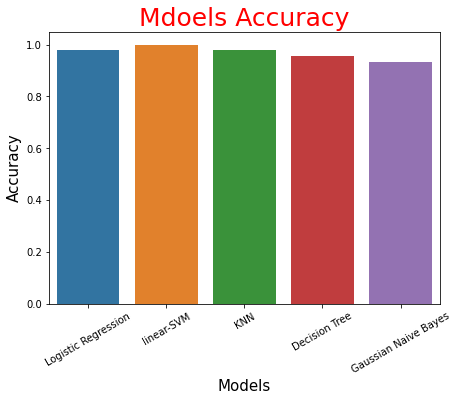

In [25]:
plt.figure(figsize=(7,5))
sns.barplot(data=df1,x="Mdoels",y="Accuracy_score")
plt.xticks(rotation=30)
plt.title("Mdoels Accuracy",size=25,color="red")
plt.xlabel("Models",size=15)
plt.ylabel("Accuracy",size=15)
plt.show()

### Observation
* As seen here Liner SVM and KNN is giving best accuracy score as compared to other lets cross validate out results 

## Cross Validation
We will check accuracy with cross validation techniques
we check accuray for different combinations records for traning and testing data set 
lets we divide entire data set into 5 equal parts so that 1 part for test and rest 4 parts for traning data
so everytime machine will takes differents combination of folds for train and test data set and calculate 5 differents values of accuracy then we will calculate mean accuracy to get avg accuracy of model 

In [26]:
model = svm.SVC(kernel='linear')
model.fit(X_train,Y_train)
y_pred_svm = model.predict(X_test)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(Y_test,y_pred_svm))
print(classification_report(Y_test,y_pred_svm))

The accuracy of the Logistic Regression is 1.0
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      1.00      1.00        18
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



### Confusuion Matrix of SVM

In [27]:
print(confusion_matrix(Y_test,y_pred_svm))

[[14  0  0]
 [ 0 18  0]
 [ 0  0 13]]


#### Import Libray for cross validation

In [28]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

### Lets check cross validation accuracy for SVM and KNN

#### cross vald accuracy for SVM 

In [29]:
cross_val_accuracy_svm = cross_val_score(model,X,Y, cv = 5, scoring = "accuracy")
cross_val_accuracy_svm

array([0.96666667, 1.        , 0.96666667, 0.96666667, 1.        ])

In [30]:
cross_val_accuracy_svm.mean()

0.9800000000000001

#### cross vald accuracy for KNN 

In [31]:
model1 = KNeighborsClassifier()
cross_val_accuracy_KNN = cross_val_score(model1,X,Y, cv = 5, scoring = "accuracy")

In [32]:
cross_val_accuracy_KNN.mean()

0.9733333333333334

### <b>Conclusion<b> :
* From Above we can see clearly conclude that Cross Validation accuracy of SVM is slight more than KNN so we will consider SVM for our case as its perform very well
* As we have implimented differents machine algorithms to sovle classification problem of iris data set  and we get best accuracy in SVM linear

## Thanking You !!!!

## <b>So please Upvote if you like my notebook<b>
### Hope You like